In [522]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [523]:
df = pd.read_csv('train.csv')


In [524]:
import pandas as pd

# Supondo que 'data' seja o seu DataFrame e 'engine_capacity' seja o nome da coluna
# Substitua 'data' e 'engine_capacity' com os seus dados reais
valores_unicos = df['mileage'].unique()

print("Valores únicos na coluna 'engine_capacity':")
print(valores_unicos)


Valores únicos na coluna 'engine_capacity':
['23.84 kmpl' '17.5 kmpl' '17.4 kmpl' '14.08 kmpl' '21.4 kmpl'
 '17.66 kmpl' '17.52 kmpl' '16.09 kmpl' '22.48 kmpl' '18.24 kmpl'
 '21.74 kmpl' '19.27 kmpl' '23.01 kmpl' '21.5 kmpl' '22.38 kmpl' '18 kmpl'
 '22.41 kmpl' '11 kmpl' '27.39 kmpl' '16.55 kmpl' '19 kmpl' '23.59 kmpl'
 '15.1 kmpl' '18.6 kmpl' nan '20.36 kmpl' '16.38 kmpl' '18.2 kmpl'
 '22.77 kmpl' '17 kmpl' '17.6 kmpl' '18.15 kmpl' '19.34 kmpl' '11.3 kmpl'
 '20.7 kmpl' '22.9 kmpl' '14.84 kmpl' '20.71 kmpl' '17.7 kmpl' '15.8 kmpl'
 '17.05 kmpl' '18.16 kmpl' '16 kmpl' '18.7 kmpl' '14.8 kmpl' '15.74 kmpl'
 '18.3 kmpl' '15.6 kmpl' '15.68 kmpl' '18.9 kmpl' '24.2 kmpl' '14.11 kmpl'
 '16.35 kmpl' '22.05 kmpl' '17.01 kmpl' '23.95 kmpl' '19.17 kmpl'
 '17.8 kmpl' '20 kmpl' '26.1 kmpl' '19.67 kmpl' '12.8 kmpl' '22.07 kmpl'
 '26.2 kmpl' '18.06 kmpl' '14.5 kmpl' '34.05 kmpl' '20.51 kmpl' '33 kmpl'
 '13.68 kmpl' '16.36 kmpl' '25.8 kmpl' '17.3 kmpl' '21.21 kmpl'
 '16.47 kmpl' '13.9 kmpl' '23 kmpl' '

In [525]:
# SEATS __________________________________________________
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')


# KMS __________________________________________________
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)

Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]
df['max_power'] = Correct_Max_Power



# MILEAGE __________________________________________________
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40

        consumo_correto.append(valor if pd.notnull(i) else None)

while len(consumo_correto) < len(df):
    consumo_correto.append(None)

df['mileage'] = consumo_correto



# OWNER TYPE __________________________________________________

# Substituir os valores em branco ('') pela moda ('mode') da coluna 'owner_type'
df_sem_nulos = df.dropna(subset=['owner_type']) # Calcula a moda
df_sem_nulos = df.dropna(subset=['mileage'])

# INSURANCE __________________________________________________
#Deletar "insurance"
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Substituir valores em branco e valores numéricos por 'No Insurance'
df['insurance'] = df['insurance'].apply(lambda x: 'No Insurance' if pd.isnull(x) or pd.api.types.is_numeric_dtype(x) else x)

#Corrigir "Third Party" com espaço extra
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')







Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:


In [526]:
import pandas as pd

# Extraindo o ano (os primeiros 4 dígitos) e a marca e modelo juntos
df['ano'] = df['full_name'].str.extract(r'^(\d{4})')  # Expressão para os primeiros 4 dígitos
df['marca_e_modelo'] = df['full_name'].str.extract(r'^\d{4}\s(.+)')  # Restante como marca e modelo

# Exibindo as primeiras linhas para verificar a nova estrutura
print(df[['marca_e_modelo', 'ano']].head())





                                      marca_e_modelo   ano
0                                 Tata Tiago XZ Plus  2019
1                               Honda WR-V i-VTEC VX  2018
2                               Honda City i VTEC SV  2015
3  Tata New Safari XZA Plus Adventure Edition AT ...  2021
4                         Maruti Baleno 1.2 CVT Zeta  2019


In [527]:
df_sem_nulos = df.dropna(subset=['body_type'])

In [528]:
'''
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)
    '''

"\n#BODY TYPE ----------------------\n#Replace the missing types and the ones that were wrong\ndf.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',\n                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',\n                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'\ndf.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', \n                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'\ndf.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'\ndf.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '

In [529]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    
    'body_type': 'string',
    'mileage': float,
})

In [530]:
df

,full_name,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,resale_price_Lakh,ano,marca_e_modelo
0,2019 Tata Tiago XZ Plus,Nov 2019,1199.0,Third Party,Manual,30910.0,First Owner,Petrol,83.8,5.0,23.84,Hatchback,Pune,5.66,2019.0,Tata Tiago XZ Plus
1,2018 Honda WR-V i-VTEC VX,Apr 2018,1199.0,Zero Dep,Manual,48089.0,Third Owner,Petrol,88.7,5.0,17.50,SUV,Jaipur,6.64,2018.0,Honda WR-V i-VTEC VX
2,2015 Honda City i VTEC SV,May 2015,1497.0,Third Party,Manual,51000.0,Second Owner,Petrol,117.3,5.0,17.40,Sedan,Mumbai,5.65,2015.0,Honda City i VTEC SV
3,2021 Tata New Safari XZA Plus Adventure Editio...,2021,1956.0,Third Party,Automatic,30000.0,First Owner,Diesel,167.6,7.0,14.08,SUV,Mumbai,23.00,2021.0,Tata New Safari XZA Plus Adventure Edition AT ...
4,2019 Maruti Baleno 1.2 CVT Zeta,Jun 2019,1197.0,Zero Dep,Automatic,61113.0,First Owner,Petrol,83.1,5.0,21.40,Hatchback,Kolkata,6.87,2019.0,Maruti Baleno 1.2 CVT Zeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13951,2021 Kia Carnival Premium,2021,2199.0,Third Party,Automatic,80000.0,Second Owner,Diesel,197.2,7.0,NaN,MUV,Hyderabad,26.50,2021.0,Kia Carnival Premium
13952,2017 Hyundai i20 1.2 Magna Executive,Dec 2017,1197.0,Third Party,Manual,17923.0,First Owner,Petrol,81.8,5.0,NaN,Hatchback,Gurgaon,5.87,2017.0,Hyundai i20 1.2 Magna Executive
13953,2017 Skoda Rapid 1.5 TDI Ambition BSIV,Jan 2018,1498.0,Comprehensive,Manual,63389.0,Second Owner,Diesel,108.6,5.0,NaN,Sedan,Hyderabad,7.43,2017.0,Skoda Rapid 1.5 TDI Ambition BSIV
13954,2017 Maruti Vitara Brezza ZDi,Apr 2017,1248.0,Comprehensive,Manual,40000.0,Second Owner,Diesel,88.5,5.0,NaN,SUV,Bangalore,9.45,2017.0,Maruti Vitara Brezza ZDi


In [531]:
df_sem_nulos = df.dropna(subset=['registered_year'])
novo_valor = df['mileage'].mean()
df['mileage'] = df['mileage'].fillna(novo_valor)

In [532]:
df_sem_nulos = df.dropna(subset=['engine_capacity'])
novo_valor = df['engine_capacity'].mean()
df['engine_capacity'] = df['engine_capacity'].fillna(novo_valor)

In [533]:
df_sem_nulos = df.dropna(subset=['max_power'])
novo_valor = df['max_power'].mean()
df['max_power'] = df['max_power'].fillna(novo_valor)

In [534]:
df_sem_nulos = df.dropna(subset=['kms_driven'])
novo_valor = df['kms_driven'].mean()
df['kms_driven'] = df['kms_driven'].fillna(novo_valor)

In [535]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca_e_modelo               object
dtype: object


In [536]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
  
   
})

In [537]:
# Definição de 6 grupos e rótulos correspondentes
limites = [0, 5, 10, 20, 30, 40, df['resale_price_Lakh'].max() + 1]

rotulos = ['muito baixa', 'baixa', 'média-baixa', 'média-alta', 'alta', 'muito alta']

# Aplicação dos limites e rótulos para criar as categorias
df['categoria_marca'] = pd.cut(df.groupby('marca_e_modelo')['resale_price_Lakh'].transform('mean'), bins=limites, labels=rotulos, right=False)

# Mostra o resultado
print(df[['marca_e_modelo', 'resale_price_Lakh', 'categoria_marca']])

                                          marca_e_modelo  resale_price_Lakh  \
0                                     Tata Tiago XZ Plus               5.66   
1                                   Honda WR-V i-VTEC VX               6.64   
2                                   Honda City i VTEC SV               5.65   
3      Tata New Safari XZA Plus Adventure Edition AT ...              23.00   
4                             Maruti Baleno 1.2 CVT Zeta               6.87   
...                                                  ...                ...   
13951                               Kia Carnival Premium              26.50   
13952                    Hyundai i20 1.2 Magna Executive               5.87   
13953                  Skoda Rapid 1.5 TDI Ambition BSIV               7.43   
13954                           Maruti Vitara Brezza ZDi               9.45   
13955                              Honda Amaze S i-Vtech               4.55   

      categoria_marca  
0               baixa  
1  

In [538]:
# Verificar os limites definidos e o preço de revenda máximo no DataFrame
print("Limites definidos:", limites)
print("Preço de revenda máximo:", df['resale_price_Lakh'].max())

# Verificar em qual grupo está o preço para 'Mercedes-Benz G G 350d'
print(df[df['marca_e_modelo'] == 'Mercedes-Benz G G 350d'][['marca_e_modelo', 'resale_price_Lakh', 'categoria_marca']])



Limites definidos: [0, 5, 10, 20, 30, 40, 226.0]
Preço de revenda máximo: 225.0
               marca_e_modelo  resale_price_Lakh categoria_marca
12532  Mercedes-Benz G G 350d              225.0      muito alta


In [539]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.18667511225498815
         Diesel: 0.500913650476359
            CNG: 1.5383795956654682
       Electric: 2.4457909564400544
            LPG: 2.7830331247584805
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954    

In [540]:
# categoria_marca __________________________________________________

fuel_types = df['categoria_marca']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

print(df)

_________________categoria_marca__________________
          baixa: 0.4173823913245844
     média-alta: 1.4354909998002425
     muito alta: 1.6031817168294924
           alta: 1.8103072096251425
    muito baixa: 0.3996861691940158
    média-baixa: 0.8463445807147788
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambiti

In [541]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

    First Owner: 0.15442210598847178
    Third Owner: 1.3474934199453568
   Second Owner: 0.6175178443879846
    Fifth Owner: 2.5319771040563377
   Fourth Owner: 2.1033682756178482
            nan: 4.144760960776074
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                   

In [542]:
# INSURANCE __________________________________________________

insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  
    idf[insurance] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Create new column 
df['id_insurance'] = df['insurance'].map(idf)

    Third Party: 0.25934319566513714
       Zero Dep: 1.3212867316057721
  Comprehensive: 0.439581715902397
  Not Available: 1.422127038242261
              1: 3.3666097103924297
              2: 3.5427009694481106
   No Insurance: 3.3666097103924297


In [543]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

           Pune: 1.0890004960883384
         Jaipur: 1.289241805108273
         Mumbai: 0.9181610555687159
        Kolkata: 1.1739493499035554
          Delhi: 0.7611250924141936
      Bangalore: 0.8701413416848351
      Hyderabad: 1.0331624358956792
        Chennai: 1.1252292762448177
        Gurgaon: 1.2215169421457968
     Chandigarh: 1.6031817168294924
      Ahmedabad: 1.1198650006685882
        Lucknow: 1.5102836906153416
           Agra: 1.89190792979618


In [544]:
'''
# MODELO _____________________________________

modelos = df['modelo']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['modelo'].map(idf)

print(df)
'''

"\n# MODELO _____________________________________\n\nmodelos = df['modelo']\nn_docs = len(df)\nidf = {}\n\n# Uniques\nunique_modelos = modelos.unique()\n\nfor modelo in unique_modelos:\n    k = sum(modelo == val for val in modelos)  \n    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero\n\n# Create new column \ndf['id_modelos'] = df['modelo'].map(idf)\n\nprint(df)\n"

In [545]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.37457193804008
            SUV: 0.5976018394486557
          Sedan: 0.5626975978643645
            BMW: 3.843730965112092
            MUV: 1.3658864887733337
         Maruti: 2.889488455672767
       Minivans: 2.412367200953105
  Mercedes-Benz: 3.299662920761816
           Cars: 3.299662920761816
          Coupe: 3.144760960776073
         Jaguar: 3.667639706056411
          Wagon: 3.5427009694481106
         Datsun: 3.843730965112092
         Pickup: 3.144760960776073
           Tata: 3.3666097103924297
          Honda: 3.843730965112092
   Convertibles: 3.667639706056411
        Hyundai: 3.843730965112092
       Mahindra: 3.667639706056411
          Volvo: 3.843730965112092
         Toyota: 3.843730965112092
          Isuzu: 3.843730965112092
          Skoda: 3.843730965112092
      Chevrolet: 3.843730965112092
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1   

In [546]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [547]:

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    
    'id_categoria_marca': float,
})

In [548]:
contagem_nulos = df.isnull().sum()

print(f"O número de valores nulos na coluna é: {contagem_nulos}")

O número de valores nulos na coluna é: full_name              0
registered_year       54
engine_capacity        0
insurance              0
transmission_type      0
kms_driven             0
owner_type            36
fuel_type              0
max_power              0
seats                  0
mileage                0
body_type              0
city                   0
resale_price_Lakh      0
ano                    0
marca_e_modelo         0
categoria_marca        0
id_fuel_type           0
id_categoria_marca     0
id_owner_type          0
id_insurance           0
id_city                0
id_body_type           0
id_transmissao         0
dtype: int64


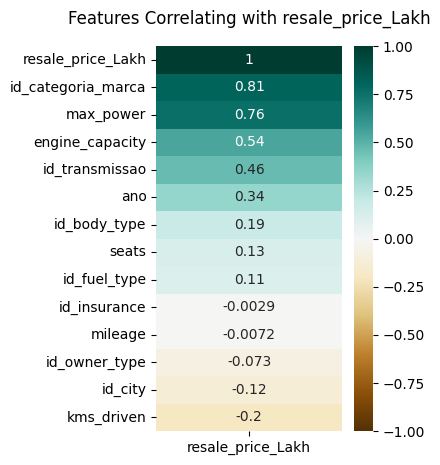

In [549]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [550]:
#Export
#Not the target
colunas_selecionadas = ['id_transmissao', 'id_body_type','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']


if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Acenario2Ideia2NS.csv', index=False)

In [551]:
df.columns

Index(['full_name', 'registered_year', 'engine_capacity', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power', 'seats', 'mileage', 'body_type', 'city',
       'resale_price_Lakh', 'ano', 'marca_e_modelo', 'categoria_marca',
       'id_fuel_type', 'id_categoria_marca', 'id_owner_type', 'id_insurance',
       'id_city', 'id_body_type', 'id_transmissao'],
      dtype='object')

In [552]:
#Export
#Not the target
colunas_selecionadas = ['transmission_type','id_transmissao','body_type','id_body_type','modelo','id_modelos','marca','categoria_marca','id_categoria_marca', 'mileage','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','fuel_type','id_fuel_type','kms_driven','max_power','owner_type','id_owner_type','resale_price_Lakh']


if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todasIdeia2.csv', index=False)